In [54]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('FOMC.csv')
data.columns = ['date','FOMC','ret']
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d')
data.index = data['date']
del data['date']
data['abnormal'] = np.nan
data.head()

,FOMC,ret,abnormal
date,,,
1980-01-02,0,-0.020016,NaN
1980-01-03,0,-0.004558,NaN
1980-01-04,0,0.012308,NaN
1980-01-07,0,0.003118,NaN
1980-01-08,0,0.021196,NaN


In [56]:
FOMC_df = data.loc['1993-01-01':'2015-12-31',:][data.loc['1993-01-01':'2015-12-31',:]['FOMC']==1]
FOMC_df.head()

,FOMC,ret,abnormal
date,,,
1993-02-03,1,0.010314,NaN
1993-03-23,1,-0.000289,NaN
1993-05-18,1,0.000261,NaN
1993-07-07,1,0.003230,NaN
1993-08-17,1,0.002051,NaN


In [57]:
#(b)
FOMC_abnormal = []
for i in range(len(FOMC_df.index)):
    info = FOMC_df.iloc[i,:]
    estimation_start = datetime.date(info.name.year-1,info.name.month,info.name.day).strftime(format = '%Y-%m-%d')
    estimation_end = (datetime.date(info.name.year,info.name.month,info.name.day)-datetime.timedelta(days=1)).strftime(format = '%Y-%m-%d')
    estimation_avg = data.loc[estimation_start:estimation_end,'ret'].mean()
    data.loc[estimation_start:estimation_end,'abnormal'] = data.loc[estimation_start:estimation_end,'ret'] - window_avg
    FOMC_abnormal.append(info['ret']-estimation_avg)
FOMC_abnormal = pd.Series(FOMC_abnormal,name='FOMC abnormal')

In [58]:
N = len(FOMC_abnormal)
z_score = FOMC_abnormal.mean()/(1/N**2*(FOMC_abnormal**2).sum())**0.5
print("z-score is %.4f" %z_score)

z-score is 3.3437


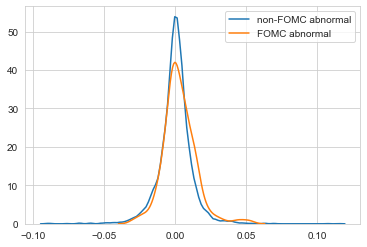

In [59]:
#(c)
non_FOMC_abnormal = data.loc['1993-01-01':'2015-12-31',:][data.loc['1993-01-01':'2015-12-31','FOMC']==0]['abnormal']
non_FOMC_abnormal.name = 'non-FOMC abnormal'
#sns.set_style("whitegrid")
sns.kdeplot(non_FOMC_abnormal)
sns.kdeplot(FOMC_abnormal)
plt.legend()

In [60]:
#(e)
#(i)
FOMC_df = data.loc['2016-01-01':,:][data.loc['2016-01-01':,:]['FOMC']==1]
FOMC_abnormal = []
for i in range(len(FOMC_df.index)):
    info = FOMC_df.iloc[i,:]
    estimation_start = datetime.date(info.name.year-1,info.name.month,info.name.day).strftime(format = '%Y-%m-%d')
    estimation_end = (datetime.date(info.name.year,info.name.month,info.name.day)-datetime.timedelta(days=1)).strftime(format = '%Y-%m-%d')
    estimation_avg = data.loc[estimation_start:estimation_end,'ret'].mean()
    data.loc[estimation_start:estimation_end,'abnormal'] = data.loc[estimation_start:estimation_end,'ret'] - window_avg
    FOMC_abnormal.append(info['ret']-estimation_avg)
FOMC_abnormal = pd.Series(FOMC_abnormal,name='FOMC abnormal')
N = len(FOMC_abnormal)
z_score = FOMC_abnormal.mean()/(1/N**2*(FOMC_abnormal**2).sum())**0.5
print("z-score is %.4f" %z_score)

z-score is -0.5970


In [74]:
#(e)
#(ii)
TNX = pd.read_csv('TNX.csv',usecols=[0,5])
TNX['ret'] = (TNX['Adj Close'] - TNX['Adj Close'].shift(1))/TNX['Adj Close'].shift(1)
del TNX['Adj Close']
TNX.columns = ['date','ret']
TNX.index = TNX['date']
del TNX['date']
TNX = TNX.join(data['FOMC'])
TNX.dropna(inplace=True)
TNX['abnormal'] = np.nan
TNX.head()

,ret,FOMC,abnormal
date,,,
1992-01-03,0.010324,0.0,NaN
1992-01-07,-0.008798,0.0,NaN
1992-01-08,0.001479,0.0,NaN
1992-01-09,0.002954,0.0,NaN
1992-01-10,0.008837,0.0,NaN


In [79]:
FOMC_df = TNX.loc['1993-01-01':'2015-12-31',:][TNX.loc['1993-01-01':'2015-12-31',:]['FOMC']==1]
FOMC_abnormal = []
for i in range(len(FOMC_df.index)):
    info = FOMC_df.iloc[i,:]
    estimation_start = datetime.date(info.name.year-1,info.name.month,info.name.day).strftime(format = '%Y-%m-%d')
    estimation_end = (datetime.date(info.name.year,info.name.month,info.name.day)-datetime.timedelta(days=1)).strftime(format = '%Y-%m-%d')
    estimation_avg = TNX.loc[estimation_start:estimation_end,'ret'].mean()
    TNX.loc[estimation_start:estimation_end,'abnormal'] = TNX.loc[estimation_start:estimation_end,'ret'] - window_avg
    FOMC_abnormal.append(info['ret']-estimation_avg)
FOMC_abnormal = pd.Series(FOMC_abnormal,name='FOMC abnormal')
N = len(FOMC_abnormal)
z_score = FOMC_abnormal.mean()/(1/N**2*(FOMC_abnormal**2).sum())**0.5
print("z-score is %.4f" %z_score)

z-score is -0.1515


In [80]:
FOMC_df = TNX.loc['2016-01-01':,:][TNX.loc['2016-01-01':,:]['FOMC']==1]
FOMC_abnormal = []
for i in range(len(FOMC_df.index)):
    info = FOMC_df.iloc[i,:]
    estimation_start = datetime.date(info.name.year-1,info.name.month,info.name.day).strftime(format = '%Y-%m-%d')
    estimation_end = (datetime.date(info.name.year,info.name.month,info.name.day)-datetime.timedelta(days=1)).strftime(format = '%Y-%m-%d')
    estimation_avg = TNX.loc[estimation_start:estimation_end,'ret'].mean()
    TNX.loc[estimation_start:estimation_end,'abnormal'] = TNX.loc[estimation_start:estimation_end,'ret'] - window_avg
    FOMC_abnormal.append(info['ret']-estimation_avg)
FOMC_abnormal = pd.Series(FOMC_abnormal,name='FOMC abnormal')
N = len(FOMC_abnormal)
z_score = FOMC_abnormal.mean()/(1/N**2*(FOMC_abnormal**2).sum())**0.5
print("z-score is %.4f" %z_score)

z-score is -1.6126
